In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [39]:
tips = sns.load_dataset('tips')
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [40]:
tips['sex'].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

<Axes: xlabel='sex'>

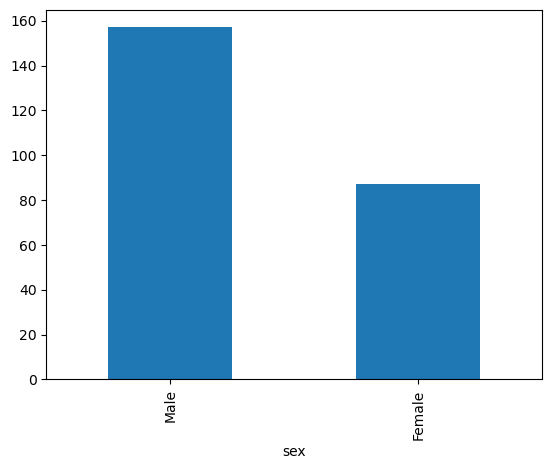

In [41]:
tips['sex'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

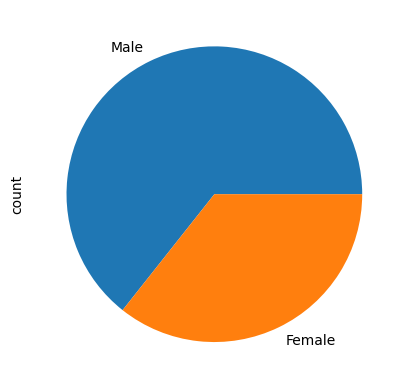

In [42]:
tips['sex'].value_counts().plot(kind='pie')

In [43]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [44]:
tips['smoker'].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [45]:
pd.crosstab(tips['sex'],tips['smoker'])

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [46]:
tips['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [47]:
pd.crosstab(tips['sex'],tips['day'])

day,Thur,Fri,Sat,Sun
sex,,,,
Male,30,10,59,58
Female,32,9,28,18


In [48]:
label_encoder = LabelEncoder()
tips['sex'] = label_encoder.fit_transform(tips['sex'])
tips['smoker'] = label_encoder.fit_transform(tips['smoker'])
tips['day'] = label_encoder.fit_transform(tips['day'])

x = tips.drop(['time'],axis=1)
y = tips['time']

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [50]:
dt_clf = DecisionTreeClassifier(max_depth = 3,random_state=42)
dt_clf.fit(x_train,y_train)
dt_pred = dt_clf.predict(x_test)

print("Decision Tree Classifier Report:")
print(classification_report(y_test,dt_pred))
print("Accuracy:",accuracy_score(y_test,dt_pred))

Decision Tree Classifier Report:
              precision    recall  f1-score   support

      Dinner       0.94      0.94      0.94        34
       Lunch       0.87      0.87      0.87        15

    accuracy                           0.92        49
   macro avg       0.90      0.90      0.90        49
weighted avg       0.92      0.92      0.92        49

Accuracy: 0.9183673469387755


In [51]:
import matplotlib.pyplot as plt

[Text(0.5, 0.875, 'x[4] <= 2.5\ngini = 0.396\nsamples = 195\nvalue = [142, 53]'),
 Text(0.3, 0.625, 'x[4] <= 0.5\ngini = 0.09\nsamples = 148\nvalue = [141, 7]'),
 Text(0.2, 0.375, 'x[0] <= 16.295\ngini = 0.484\nsamples = 17\nvalue = [10, 7]'),
 Text(0.1, 0.125, 'gini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.3, 0.125, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.4, 0.375, 'gini = 0.0\nsamples = 131\nvalue = [131, 0]'),
 Text(0.7, 0.625, 'x[0] <= 18.53\ngini = 0.042\nsamples = 47\nvalue = [1, 46]'),
 Text(0.6, 0.375, 'gini = 0.0\nsamples = 31\nvalue = [0, 31]'),
 Text(0.8, 0.375, 'x[0] <= 18.93\ngini = 0.117\nsamples = 16\nvalue = [1, 15]'),
 Text(0.7, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.9, 0.125, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]')]

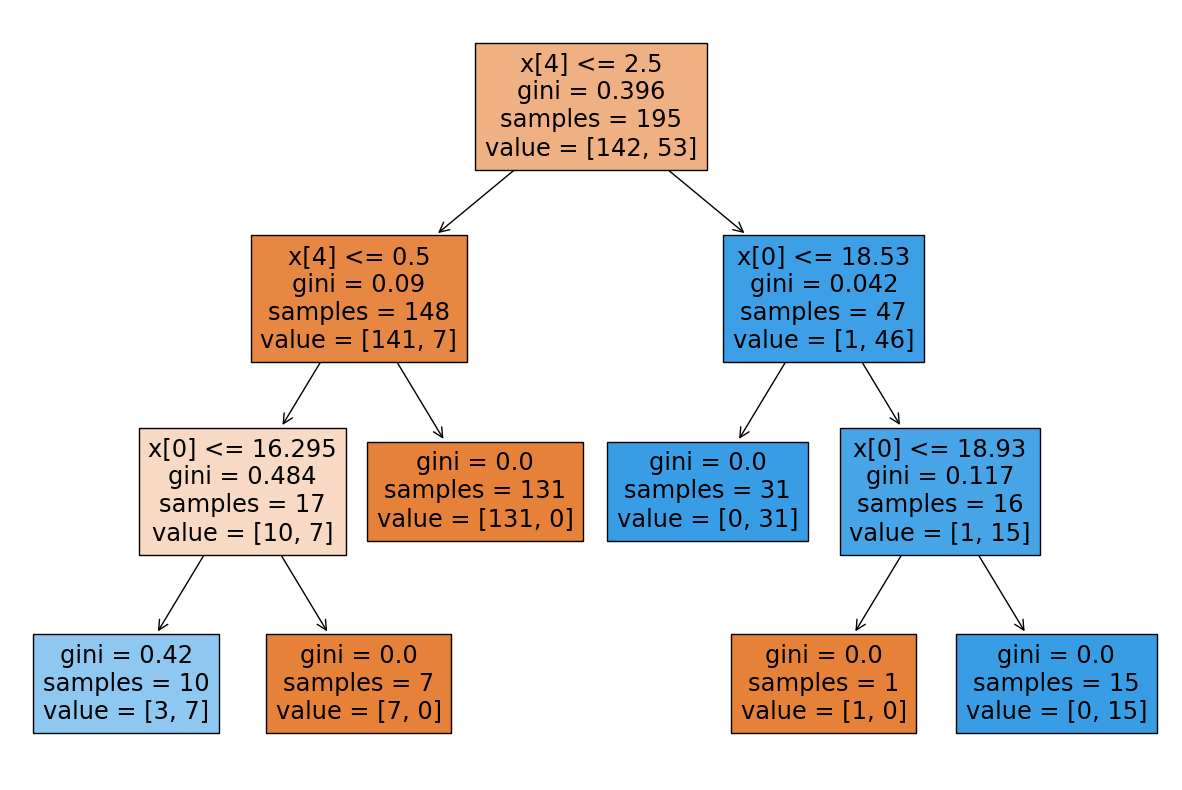

In [52]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt_clf,filled=True)

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
from sklearn.metrics import accuracy_score,classification_report

In [55]:
knn = KNeighborsClassifier()

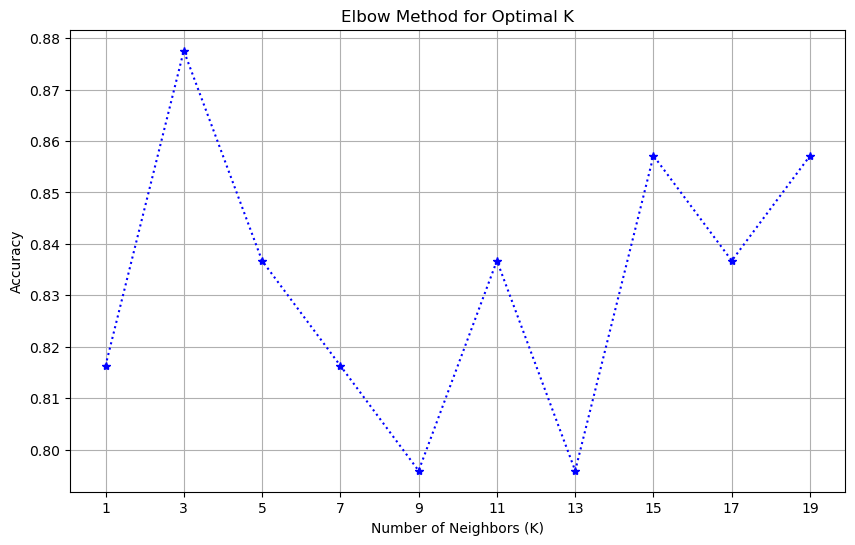

In [62]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assuming x_train, x_test, y_train, y_test are defined and initialized properly

k_values = list(range(1, 21, 2))
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='*', linestyle=':', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [63]:
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(x_train,y_train)
knn_pred = knn_clf.predict(x_test)

In [64]:
print("KNeighborsClassifier")
print(classification_report(y_test,knn_pred))
print("Accuracy:",accuracy_score(y_test,knn_pred))

KNeighborsClassifier
              precision    recall  f1-score   support

      Dinner       0.87      0.97      0.92        34
       Lunch       0.91      0.67      0.77        15

    accuracy                           0.88        49
   macro avg       0.89      0.82      0.84        49
weighted avg       0.88      0.88      0.87        49

Accuracy: 0.8775510204081632
